In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder


In [15]:
df = pd.read_csv("IRIS.csv")

le = LabelEncoder()
df['species'] = le.fit_transform(df['species'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [16]:
X = df.drop(columns='species')
y = df.species

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [37]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth = 2)

dtc.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 2,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

In [38]:
dtc.fit(X_train, y_train);

In [39]:
print(dtc.score(X_test, y_test))

0.9666666666666667


In [40]:
from sklearn.metrics import classification_report
y_pred = dtc.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.90      1.00      0.95         9
           2       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



In [41]:
from sklearn.metrics import confusion_matrix
y_pred = dtc.predict(X_test)
print(confusion_matrix(y_test, y_pred))

[[11  0  0]
 [ 0  9  0]
 [ 0  1  9]]


In [42]:
dtc.feature_importances_

array([0., 0., 0., 1.])

In [43]:
features = pd.DataFrame(dtc.feature_importances_, index=X.columns, columns=["importance"])
features.sort_values(by='importance', ascending=False)

,importance
petal_width,1.0
sepal_length,0.0
sepal_width,0.0
petal_length,0.0


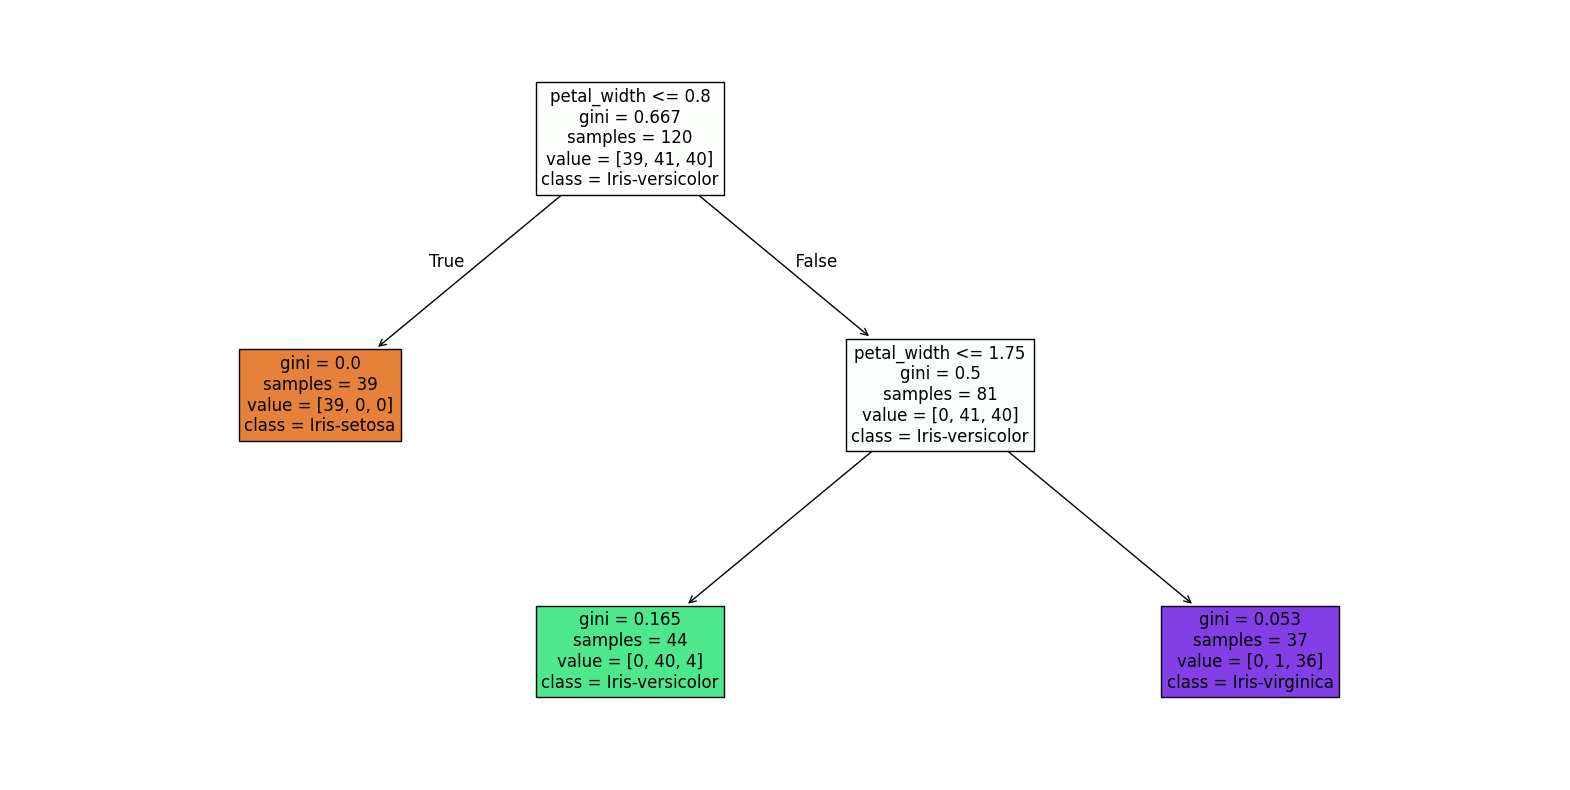

In [44]:
from sklearn import tree

plt.figure(figsize=(20, 10))

_ = tree.plot_tree(dtc, 
                   feature_names=X.columns, 
                   class_names = {0: 'Iris-setosa', 1: 'Iris-versicolor', 2 : 'Iris-virginica'}, 
                   filled=True,
                   fontsize = 12)